### Recognising Handwritten Digits on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Step 1.   Data Preparation

In [21]:
df = pd.read_csv("Datasets/MNIST-2/mnist_train.csv")
# print(df.shape)
# print(df.columns)

In [22]:
#df.head(n=5)

In [10]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [20]:
X = data[:,1:]
Y = data[:,0]
print(X.shape,Y.shape)
print(Y)

(42000, 784) (42000,)
[1 0 1 ... 7 6 9]


In [19]:
split = int(0.8 * X.shape[0])
print(split)

X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split]
Y_test = Y[split:]

print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)
print(Y_train)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)
[1 0 1 ... 0 2 2]


### Visualising Some Samples

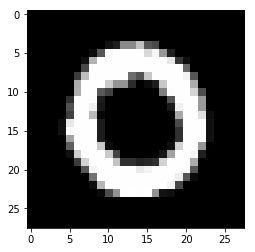

In [13]:
def drawimg(sample):
    image = sample.reshape((28,28))
    plt.imshow(image,cmap = 'gray')
    plt.show()
    #print(Y_train[1])
    
drawimg(X_train[1])

#### Step 2. KNN

In [27]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,queryPoint,K=7):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = distance(queryPoint,X[i])
        vals.append((d,Y[i]))
    
    vals = sorted(vals)
    # Pick the Nearest/First K points
    
    vals = vals[:K]
    vals = np.array(vals)
    print(vals)
    new_vals = np.unique(vals[:,1], return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    print(index)
    pred = new_vals[0][index]
    
    #print(index)
    #print(pred)
    #print(vals)
    #return vals
    return pred

#### Step 3. Make Predictions

[[1213.36886395    0.        ]
 [1235.20322215    0.        ]
 [1328.63576649    0.        ]
 [1400.12285175    0.        ]
 [1411.82612244    0.        ]
 [1425.47115018    0.        ]
 [1437.84143771    0.        ]]
(array([0.]), array([7]))
0
0


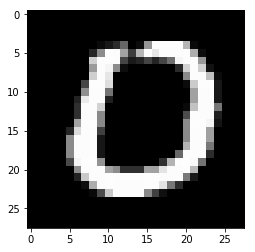

0


In [28]:
pred = knn(X_train,Y_train,X_test[0])
print(int(pred))

drawimg(X_test[0])
print(Y_test[0])